In [1]:
from sage.all import *

def noyau(DAG: Graph):
    # Calcule le noyau du DAG
    # Cette fonction prend en entrée un DAG représenté sous forme 
    # de liste d'adjacence et calcule son noyau.

    # Noyau du DAG
    N = []
    
    # Tant que le DAG n'est pas vide
    while DAG:
        # Trouve tous les puits dans le DAG actuel
        puits = DAG.sinks()
        
        for p in puits:
            # DiGraph(DAG).show()

            # Ajoute chaque puits au noyau
            N.append(p)
           
            # Trouve les prédécesseurs du puits
            predecesseurs = DAG.neighbors(p)
            # print(predecesseurs)

            # Supprime le puits du DAG
            DAG.delete_vertex(p)
            
            # Supprime tous les prédécesseurs du puits du DAG
            DAG.delete_vertices(predecesseurs)
    # Retourne le noyau calculé
    return N
    

Appliquons l'algorithme au graphe d'un jeu de soustraction avec $N=20$

Graphe d'un jeu de soustraction pour N=20


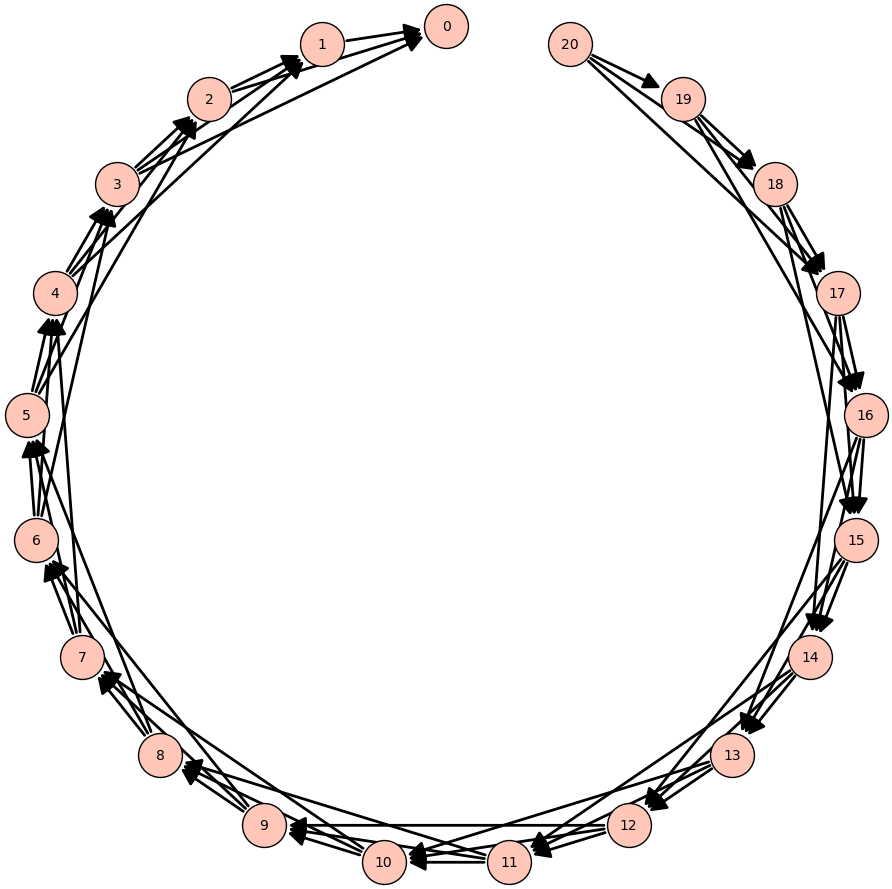

Noyau du graphe [0, 4, 8, 12, 16, 20]


In [6]:
# Cas d'un jeu de soustraction avec position initiale N=20
def succ_soustraction(n, max_retire):
    return [n - i for i in range(1, max_retire + 1) if n - i >= 0]

N = 20
max_retire = 3

sous = {n: succ_soustraction(n, max_retire) for n in range(N + 1)}
print(f"Graphe d'un jeu de soustraction pour {N=}")
sous_DAG = DiGraph(sous)

sous_DAG.show(
    layout='circular',
    figsize=12,
    vertex_size=1000,
    )
Noy = noyau(sous_DAG)
print(f"Noyau du graphe", Noy)

Appliquons l'algorithme au graphe d'un jeu de Nim avec position initiale (3,3,3)

Graphe d'un jeu de Nim à 3 piles avec position initiale  (3,3,3)


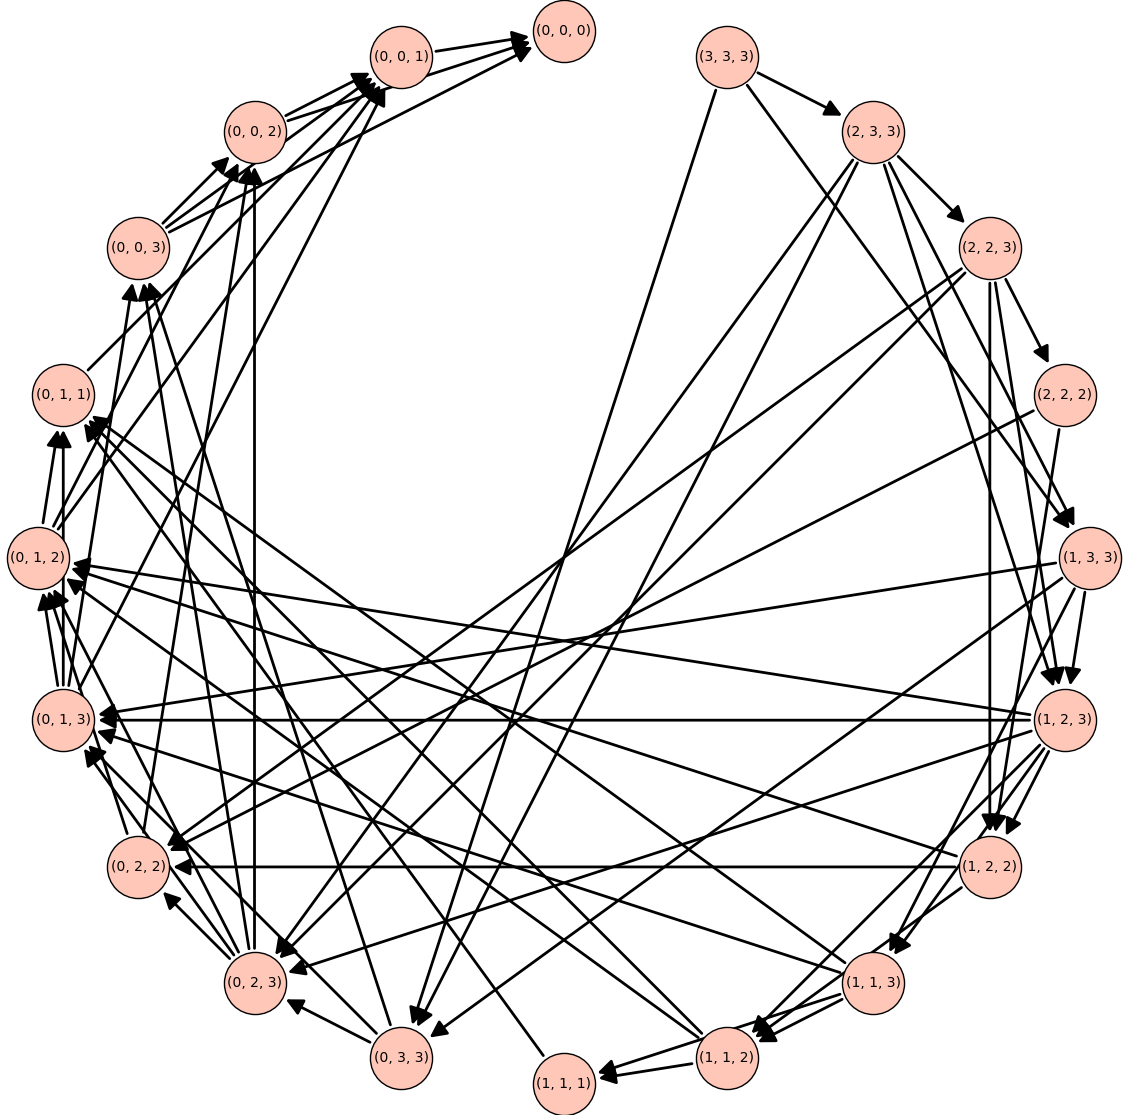

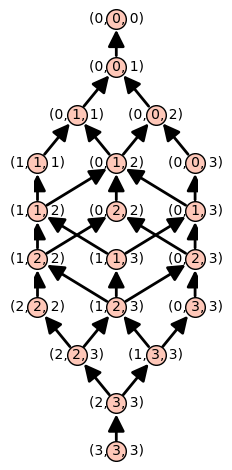

Noyau du graphe [(0, 0, 0), (0, 1, 1), (0, 2, 2), (1, 2, 3), (0, 3, 3)]


In [3]:
# Cas d'un jeu de nim à 3 piles avec position initiale (3,3,3)
def succ_nim(a,b,c):
    li=[(i,b,c) for i in range(a)] + [(a,i,c) for i in range(b)] + [(a,b,i) for i in range(c)]
    li=[tuple(sorted(i)) for i in li]
    return list(set(li)) 

N=3
nim={(a,b,c):succ_nim(a,b,c) for c in range(N+1) for b in range(c+1) for a in range(b+1)}

print(f"Graphe d'un jeu de Nim à {N} piles avec position initiale  ({N},{N},{N})")
nim_DAG = DiGraph(nim)
nim_DAG.show(
    layout='circular',
    figsize=15,
    vertex_size=2000,
    )
POS = Poset(nim_DAG)
POS.show()
Noy = noyau(nim_DAG)

print(f"Noyau du graphe", Noy)